## Домашнее задание

**Lvl 1:**

* взять подготовленные раннее данные из задачи **Titanic**, обучиться на них с помощью дерева решений и кросс-валидации и сделать сабмит
* кросс-валидацию желательно сделать сразу по нескольким фичам ( параметр *grid* в *GridSearchCV* )
* определить самые важные фичи
* вывести дерево решений (можете попробовать установить pydot и webgraphviz для отрисовки деревьев внутри ноутбука)

**Результат:** скрины нового сабмита на Kaggle и построенного дерева

**Lvl 2:** (опционально)

* С помощью функций sklearn.metrics.auc, precision, recall составить функцию для расчёта ROC-AUC, ROC-PRC
* Придумать себе интересную задачу на основе данных из интернета =) Спарсить ещё какой-нибудь сайт (не Ведомости) и решить задачу классификации. Делать свои проекты - круто. Если будут - кидайте мне =) [@NikitaKuznetsov](http://t.me/NikitaKuznesov)

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
import pickle
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [113]:
X_train_imputed_scaled = load_obj('X_train_imputed_scaled')
X_test_imputed_scaled = load_obj('X_test_imputed_scaled')
y_train = load_obj('y_train')

In [114]:
clf = DecisionTreeClassifier()

depths = np.arange(1,10)
grid = {'max_depth': depths, 'criterion':['gini', 'entropy'],'min_samples_split':[2,4,6], 'min_samples_leaf':[1,2,3] }
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)
gridsearch.fit(X_train_imputed_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [115]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [116]:

for col, val in zip(X_train_imputed_scaled.columns, gridsearch.best_estimator_.feature_importances_):
    print("{:30} {:.4f}".format(col, val))

Age                            0.1121
SibSp                          0.0530
Parch                          0.0019
Fare                           0.2028
isMale                         0.4580
Pclass_1                       0.0408
Pclass_2                       0.0000
Pclass_3                       0.1147
Embarked_C                     0.0085
Embarked_Q                     0.0000
Embarked_S                     0.0081


In [117]:
y_pred_train = gridsearch.best_estimator_.predict_proba(X_train_imputed_scaled)

In [118]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_pred_train[:,1].reshape(-1,1))

0.9441115691475195

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, gridsearch.best_estimator_.predict(X_train_imputed_scaled))

0.8832772166105499

In [120]:
y_pred_test = gridsearch.best_estimator_.predict(X_test_imputed_scaled)

In [121]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [122]:
X_test_imputed_scaled

array([[ 0.36944878, -0.4745452 , -0.47367361, ..., -0.48204268,
         3.25137334, -1.61470971],
       [ 1.33137817,  0.43279337, -0.47367361, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [ 2.48569343, -0.4745452 , -0.47367361, ..., -0.48204268,
         3.25137334, -1.61470971],
       ...,
       [ 0.67726619, -0.4745452 , -0.47367361, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [ 0.        , -0.4745452 , -0.47367361, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [ 0.        ,  0.43279337,  0.76762988, ...,  2.0745051 ,
        -0.30756234, -1.61470971]])

In [123]:
test = pd.read_csv('test.csv')
f_name = test.keys()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [124]:
test['Survived']= y_pred_test

In [125]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [126]:
result = test[['PassengerId','Survived']]
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [127]:
result.to_csv('result2.csv', index=False)

In [128]:
from sklearn.tree import export_graphviz
print(export_graphviz(gridsearch.best_estimator_, feature_names=f_name, out_file=None, filled=True) )

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Age <= -0.309\ngini = 0.473\nsamples = 891\nvalue = [549, 342]", fillcolor="#e5813960"] ;
1 [label="Ticket <= -0.103\ngini = 0.383\nsamples = 314\nvalue = [81, 233]", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Sex <= -0.067\ngini = 0.1\nsamples = 170\nvalue = [9, 161]", fillcolor="#399de5f1"] ;
1 -> 2 ;
3 [label="PassengerId <= 0.562\ngini = 0.18\nsamples = 70\nvalue = [7, 63]", fillcolor="#399de5e3"] ;
2 -> 3 ;
4 [label="PassengerId <= -0.169\ngini = 0.113\nsamples = 50\nvalue = [3, 47]", fillcolor="#399de5ef"] ;
3 -> 4 ;
5 [label="PassengerId <= -0.323\ngini = 0.204\nsamples = 26\nvalue = [3, 23]", fillcolor="#399de5de"] ;
4 -> 5 ;
6 [label="Sex <= -0.379\ngini = 0.087\nsamples = 22\nvalue = [1, 21]", fillcolor="#399de5f3"] ;
5 -> 6 ;
7 [label="PassengerId <= -0.785\ngini = 0.278\nsamples = 6\nvalue = [1, 5]", fillcolor="#399de5cc"] ;
6 -> 7 ;
8 [label="gin

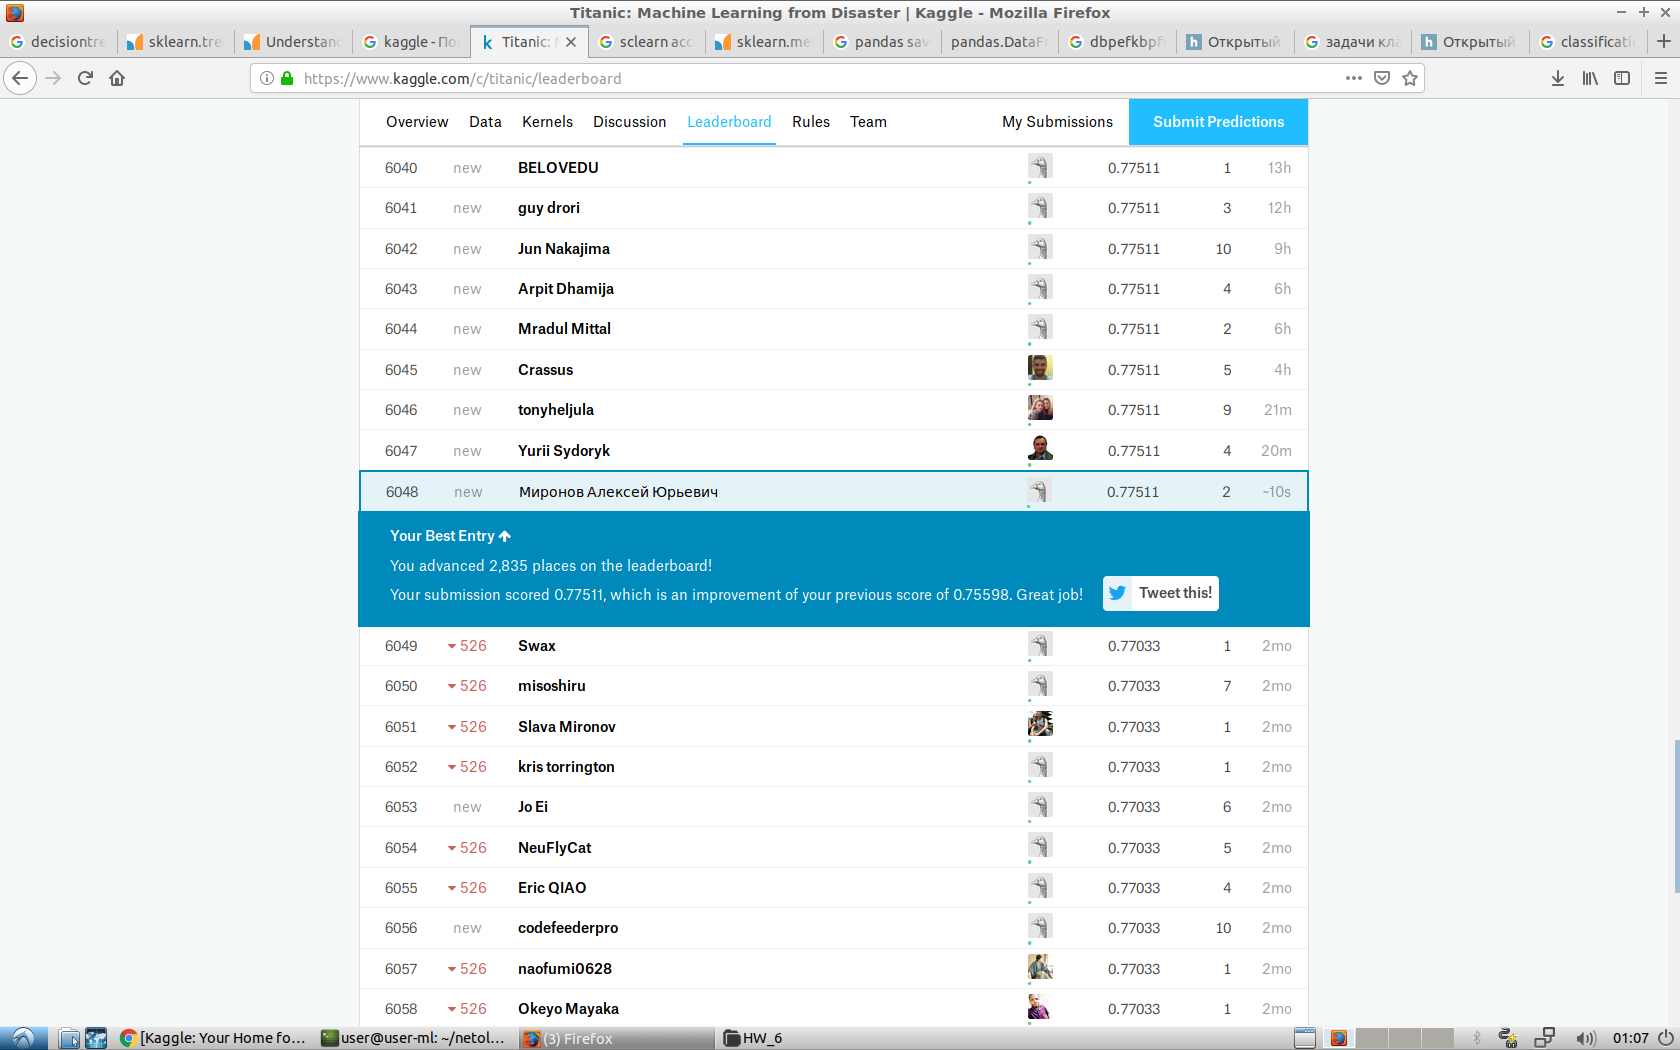

In [130]:
from IPython.display import Image
Image("commit.png")

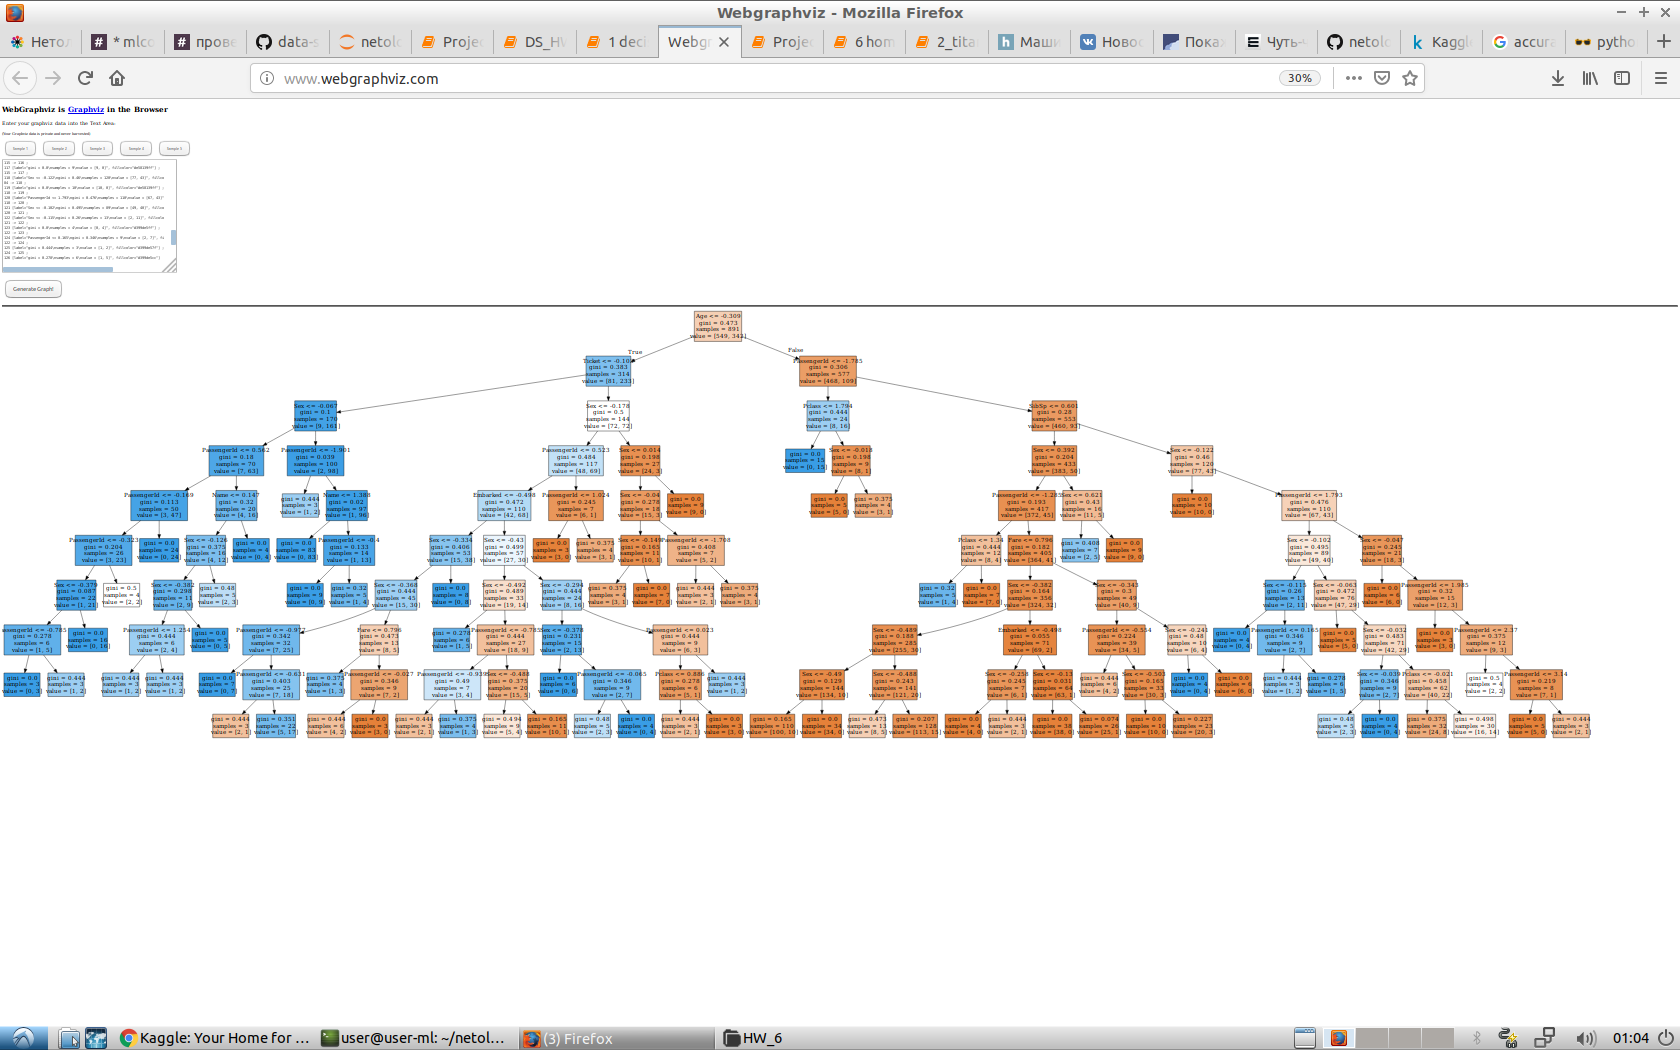

In [131]:
from IPython.display import Image
Image("tree.png")

In [89]:
mushroom = pd.read_csv('mushrooms.csv')

In [90]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [91]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [94]:
keys  = list(set(mushroom.keys()) - set(['class'],))

X = pd.get_dummies(mushroom[keys], columns = keys ) 

In [95]:
X.head()

,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,...,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,population_a,population_c,population_n,population_s,population_v,population_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [96]:
y = mushroom['class'].map({'p':1,'e':0})